## Juan Pablo Montenegro Erazo - CC1007778301

Para la solución de este laboratorio utilicé el codigo provisto en el notebook del [laboratorio correspondiente](https://github.com/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_08_nn_keras__V1.ipynb). Solo se hacen modificaciones puntuales del codigo que no alteran su estructura, con la unica excepción de la creación de la función `entrenar_modelo`, que contiene el codigo de una de las celdas del [laboratorio correspondiente](https://github.com/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_08_nn_keras__V1.ipynb) con ligeras modificaciones.

# Laboratorio
1. Para el dataset make a moon de sklearn, construir un modelo de una red neuronal con keras para clasificar los datos.

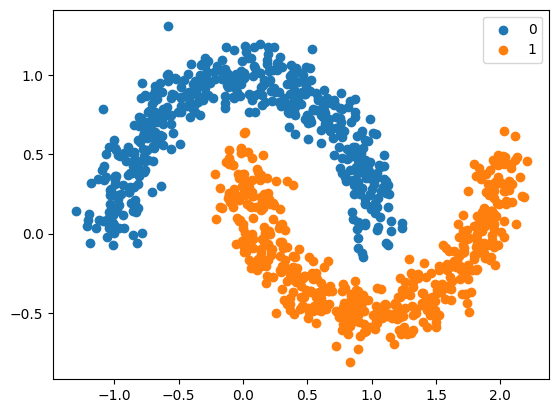

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=1)

plt.scatter(X[np.where((y==0)),0],X[np.where((y==0)),1], label='0')
plt.scatter(X[np.where((y==1)),0],X[np.where((y==1)),1], label='1')
plt.legend()
plt.show()

Epoch 1/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4576 - loss: 0.2853 - val_accuracy: 0.8280 - val_loss: 0.2033
Epoch 2/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8378 - loss: 0.1888 - val_accuracy: 0.8540 - val_loss: 0.1297
Epoch 3/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8492 - loss: 0.1238 - val_accuracy: 0.8600 - val_loss: 0.0935
Epoch 4/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8752 - loss: 0.0892 - val_accuracy: 0.8700 - val_loss: 0.0860
Epoch 5/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9024 - loss: 0.0640 - val_accuracy: 0.8920 - val_loss: 0.0738
Epoch 6/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9124 - loss: 0.0645 - val_accuracy: 0.8940 - val_loss: 0.0711
Epoch 7/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8847 - loss: 0.0767 - val_accuracy: 0.9160 - val_loss: 0.0676
Epoch 8/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9022 - loss: 0.0693 - val_accuracy: 0.8980 - val_loss

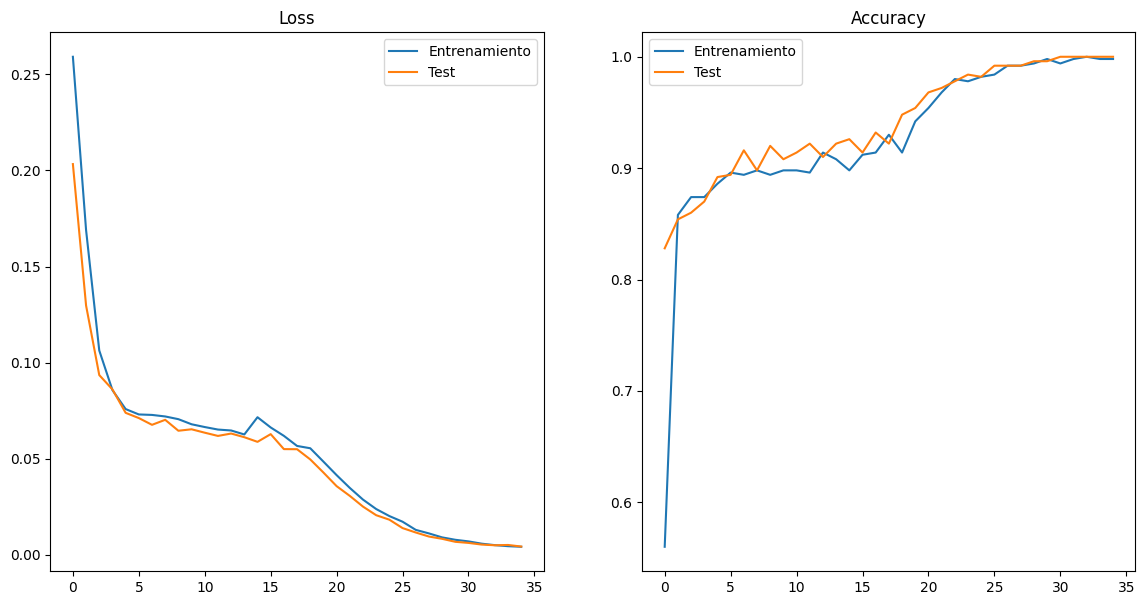

In [53]:
modelo_lunas = keras.models.Sequential()
modelo_lunas.add(keras.layers.Dense(6, input_dim = 2, activation='relu'))
modelo_lunas.add(keras.layers.Dense(8, activation='relu'))
modelo_lunas.add(keras.layers.Dense(1, activation='sigmoid'))
optimizador = keras.optimizers.Adam(learning_rate=0.01)
modelo_lunas.compile(loss = 'mse', optimizer = optimizador, metrics=['accuracy'])


def entrenar_modelo(modelo, X, y, numero_datos_entrenamiento, epocas): # Entrena al modelo que se pasa como argumento, y realiza la gráfica de pérdidas durante el entrenamiento y la gráfica de las precisión durante el entrenamiento
    keras.backend.clear_session()

    train_X = X[:numero_datos_entrenamiento, :] # Cada fila es un dato
    test_X = X[numero_datos_entrenamiento:, :]
    train_y = y[:numero_datos_entrenamiento]
    test_y = y[numero_datos_entrenamiento:]
    dimension_entrada = X.shape[1]
    history = modelo.fit(train_X, train_y, validation_data=(test_X, test_y), epochs = epocas, verbose=1)

    # Evaluación del modelo
    _, train_acc = modelo.evaluate(train_X, train_y, verbose=0)
    _, test_acc = modelo.evaluate(test_X, test_y, verbose=0)
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    # Gráficas:
    plt.figure(figsize=(14,7))
    # Gráfica de pérdidas durante el entrenamiento
    plt.subplot(121)
    plt.title('Loss')
    plt.plot(history.history['loss'], label = 'Entrenamiento')
    plt.plot(history.history['val_loss'], label = 'Test')
    plt.legend()
    # Gráfica de las precisión durante el entrenamiento
    plt.subplot(122)
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], label = 'Entrenamiento')
    plt.plot(history.history['val_accuracy'], label = 'Test')
    plt.legend()
    plt.show()


entrenar_modelo(modelo_lunas, X, y, 500, 35)

2. Para el dataset load digits, construir un modelo de red neuronal empleando keras para realizar la clasificación.

In [49]:
from sklearn.datasets import load_digits

digits = load_digits(n_class = 10)
X_2 = digits.data
y_2 = keras.utils.to_categorical(digits.target, num_classes = 10)  # codificación one-hot

X_2.shape

(1797, 64)

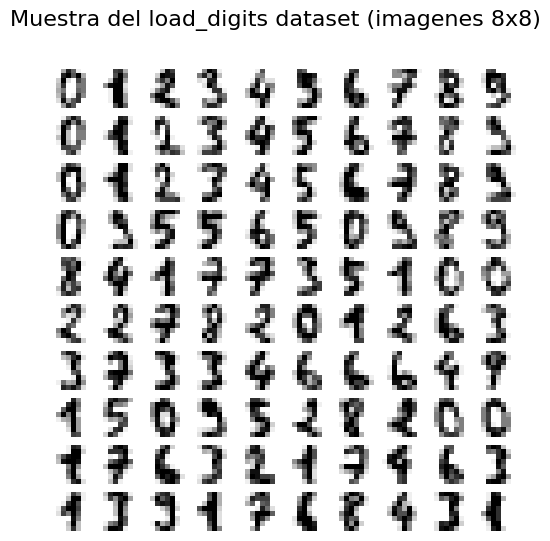

In [50]:
from sklearn.model_selection import train_test_split

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X_2[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")

_ = fig.suptitle("Muestra del load_digits dataset (imagenes 8x8)", fontsize=16)
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

Epoch 1/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4516 - loss: 1.8109 - val_accuracy: 0.8080 - val_loss: 0.7464
Epoch 2/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9036 - loss: 0.2948 - val_accuracy: 0.8620 - val_loss: 0.4499
Epoch 3/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9296 - loss: 0.1980 - val_accuracy: 0.7854 - val_loss: 1.2076
Epoch 4/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9268 - loss: 0.2514 - val_accuracy: 0.8971 - val_loss: 0.4363
Epoch 5/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9637 - loss: 0.1167 - val_accuracy: 0.8683 - val_loss: 0.5563
Epoch 6/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9624 - loss: 0.1296 - val_accuracy: 0.8921 - val_loss: 0.4228
Epoch 7/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9550 - loss: 0.1588 - val_accuracy: 0.8821 - val_loss: 0.6377
Epoch 8/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9478 - loss: 0.1357 - val_accuracy: 0.9034 - val_loss

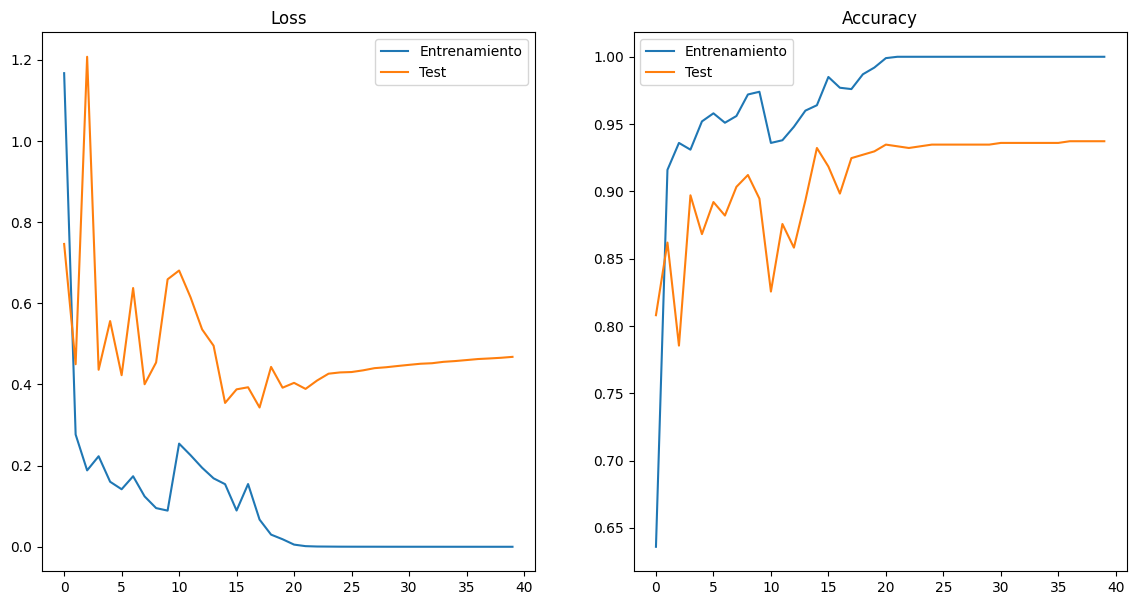

In [52]:
modelo_digitos = keras.models.Sequential()
modelo_digitos.add(keras.layers.Dense(64, input_dim = 64, activation='relu'))
modelo_digitos.add(keras.layers.Dense(64, activation='relu'))
modelo_digitos.add(keras.layers.Dense(64, activation='relu'))
modelo_digitos.add(keras.layers.Dense(64, activation='relu'))
modelo_digitos.add(keras.layers.Dense(10, activation='softmax'))
optimizador = keras.optimizers.Adam(learning_rate=0.01)
modelo_digitos.compile(loss = 'categorical_crossentropy', optimizer = optimizador, metrics=['accuracy'])

entrenar_modelo(modelo_digitos, X_2, y_2, 1000, 40)